# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [3]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

total_fruits = 100
apple = 60
oranges = 40

p = round((apple / total_fruits) , 2)
q = round((oranges / total_fruits) , 2)


print(p*100, "%")
print(q*100, "%")

60.0 %
40.0 %


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [4]:
# What is the probability that the first 5 fruits are all apples?

prob_5_apples = round((p ** 5), 6)
print(prob_5_apples*100, "%")

7.776 %


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [14]:
# your solution here
n = 20
prob_5_apples_15_oranges = (p ** 5) * (q ** 15)
print(f"Probabilidade: {prob_5_apples_15_oranges:.8f}")
print(f"Probabilidade em %: {prob_5_apples_15_oranges * 100:.6f} %")


Probabilidade: 0.00000008
Probabilidade em %: 0.000008 %


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [18]:
# your code here

prob_menos_5 = stats.binom.cdf(4, n, p)  # cdf(4) = P(X ≤ 4)
print(f"{prob_menos_5:.6f}")

print("\nProbabilidades individuais:")
for i in range(5):  # de 0 a 4 maçãs
    prob_i = stats.binom.pmf(i, n, p)
    print(f"P(X = {i}) = {prob_i:.6f}")


0.000317

Probabilidades individuais:
P(X = 0) = 0.000000
P(X = 1) = 0.000000
P(X = 2) = 0.000005
P(X = 3) = 0.000042
P(X = 4) = 0.000270


<!-- **Plot the PDF (probability distributiom function) for the above binomial distribution.** -->

**Plot the Probability Mass Function (PMF) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

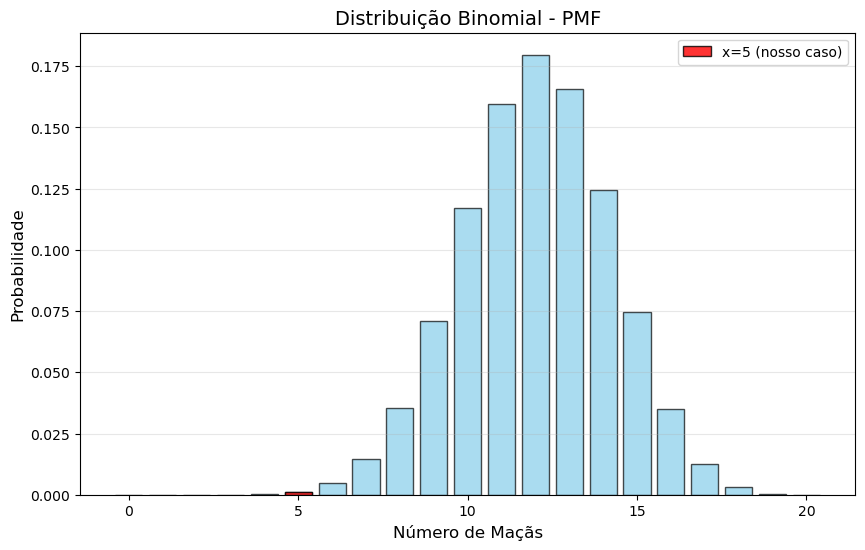

In [19]:
# your code here
# Please label the axes and give a title to the plot 


# Criando valores de x (número de maçãs)
x = np.arange(0, n+1)  # de 0 a 20 maçãs

# Calculando as probabilidades para cada x
pmf_values = stats.binom.pmf(x, n, p)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(x, pmf_values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição Binomial - PMF', fontsize=14)
plt.xlabel('Número de Maçãs', fontsize=12)
plt.ylabel('Probabilidade', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Destacando o ponto x=5
plt.bar(5, pmf_values[5], color='red', edgecolor='black', alpha=0.8, label='x=5 (nosso caso)')
plt.legend()

plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [20]:
# your code here 

media_gols = 2.3  # média de gols por partida
k_gols = 5       # número de gols que queremos calcular

# Fórmula de Poisson: P(X=k) = (λ^k * e^(-λ)) / k!
# Onde λ = média, k = valor que queremos

# Calculando usando a fórmula manualmente
prob_poisson = (media_gols ** k_gols * math.exp(-media_gols)) / math.factorial(k_gols)

print(f"Média de gols por jogo: {media_gols}")
print(f"Probabilidade de exatamente {k_gols} gols: {prob_poisson:.6f}")
print(f"Em porcentagem: {prob_poisson * 100:.4f}%")

# Usando scipy.stats para verificar
prob_poisson_scipy = stats.poisson.pmf(k_gols, media_gols)
print(f"Usando scipy: {prob_poisson_scipy:.6f}")

Média de gols por jogo: 2.3
Probabilidade de exatamente 5 gols: 0.053775
Em porcentagem: 5.3775%
Usando scipy: 0.053775


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

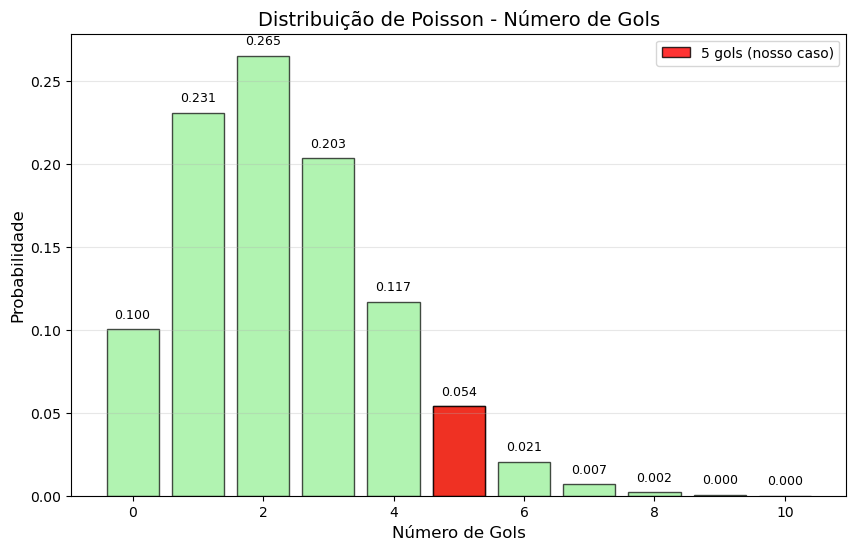

In [26]:
# your code here
# Please label the axes and give a title to the plot 

# Criando valores de x (número de gols)
x_poisson = np.arange(0, 11)  # de 0 a 10 gols

# Calculando as probabilidades
poisson_values = stats.poisson.pmf(x_poisson, media_gols)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(x_poisson, poisson_values, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribuição de Poisson - Número de Gols', fontsize=14)
plt.xlabel('Número de Gols', fontsize=12)
plt.ylabel('Probabilidade', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Destacando o ponto x=5
plt.bar(5, poisson_values[5], color='red', edgecolor='black', alpha=0.8, label='5 gols (nosso caso)')
plt.legend()

# Adicionando os valores no topo das barras
for i, v in enumerate(poisson_values):
    plt.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.show()